# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy as sp
from scipy.stats import linregress


import time
time.sleep(1)


from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
from api_keys import weather_api_key
from api_keys import  g_key
#from weather_api import weather_api as api



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [3]:
#read the csv file and display
weatherData=pd.read_csv(output_data_file)
weatherData.head()

,Unnamed: 0,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,0,Santa Rosalía,MX,1613332330,27.3167,-112.2833,65.08,43,4.54,66
1,1,Busselton,AU,1613331929,-33.6500,115.3333,69.01,92,6.80,17
2,2,New Norfolk,AU,1613331956,-42.7826,147.0587,57.99,71,1.59,100
3,3,Albany,US,1613331945,42.6001,-73.9662,33.01,56,3.00,95
4,4,Hong Kong,HK,1613331974,22.2855,114.1577,66.00,75,6.22,0


In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [6]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Url

url = "http://api.openweathermap.org/data/2.5/weather?q="
extension = "&units=imperial&appid="

In [8]:
location_name = []
location_country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
wind_speed = []
cloudiness = []

city_counter=0
tot_cities=len(cities)

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    success=True
    data_json = requests.get(url+city+extension+weather_api_key)
    data_json = data_json.json()
    
    # code By Lecture or from class
    try:
        location_name.append(data_json['name'])
        location_country.append(data_json['sys']['country'])
        date.append(data_json['dt'])
        latitude.append(data_json['coord']['lat'])
        longitude.append(data_json['coord']['lon'])
        max_temperature.append(data_json['main']['temp_max'])
        humidity.append(data_json['main']['humidity'])
        wind_speed.append(data_json['wind']['speed'])
        cloudiness.append(data_json['clouds']['all'])
        success=True
        
    except:
        tot_cities -= 1
        city_counter = city_counter
        print(f"City not found. Skipping...")
        success=False
        
    if success:
        print(f"Processing Record {city_counter} of {tot_cities} | {city}")
        city_counter += 1


Beginning Data Retrieval
-----------------------------
Processing Record 0 of 587 | port alfred
Processing Record 1 of 587 | hilo
Processing Record 2 of 587 | yashkul
Processing Record 3 of 587 | santiago de cao
Processing Record 4 of 587 | hecun
Processing Record 5 of 587 | souillac
Processing Record 6 of 587 | punta arenas
Processing Record 7 of 587 | stornoway
City not found. Skipping...
Processing Record 8 of 586 | saint george
Processing Record 9 of 586 | torbay
City not found. Skipping...
Processing Record 10 of 585 | kavieng
City not found. Skipping...
Processing Record 11 of 584 | busselton
Processing Record 12 of 584 | yar-sale
City not found. Skipping...
Processing Record 13 of 583 | komsomolskiy
Processing Record 14 of 583 | east london
Processing Record 15 of 583 | vaini
Processing Record 16 of 583 | plastun
Processing Record 17 of 583 | sulangan
Processing Record 18 of 583 | butaritari
City not found. Skipping...
Processing Record 19 of 582 | saldanha
Processing Record 20 

Processing Record 189 of 564 | sechura
Processing Record 190 of 564 | chilca
Processing Record 191 of 564 | castro
City not found. Skipping...
Processing Record 192 of 563 | plavinas
Processing Record 193 of 563 | thompson
Processing Record 194 of 563 | tuatapere
Processing Record 195 of 563 | los llanos de aridane
Processing Record 196 of 563 | talnakh
Processing Record 197 of 563 | san andres
City not found. Skipping...
City not found. Skipping...
Processing Record 198 of 561 | gallup
Processing Record 199 of 561 | mayo
Processing Record 200 of 561 | mitu
Processing Record 201 of 561 | francisco sa
Processing Record 202 of 561 | sistranda
Processing Record 203 of 561 | pahrump
Processing Record 204 of 561 | nisia floresta
Processing Record 205 of 561 | codrington
Processing Record 206 of 561 | sebes
Processing Record 207 of 561 | carutapera
Processing Record 208 of 561 | santander
Processing Record 209 of 561 | ciudad bolivar
Processing Record 210 of 561 | paamiut
Processing Record 2

Processing Record 384 of 550 | raudeberg
Processing Record 385 of 550 | kahului
Processing Record 386 of 550 | ajdovscina
City not found. Skipping...
Processing Record 387 of 549 | mumford
Processing Record 388 of 549 | sabha
City not found. Skipping...
Processing Record 389 of 548 | srednekolymsk
Processing Record 390 of 548 | merritt island
Processing Record 391 of 548 | snezhnogorsk
Processing Record 392 of 548 | kollam
Processing Record 393 of 548 | palmira
Processing Record 394 of 548 | namatanai
Processing Record 395 of 548 | san juan
Processing Record 396 of 548 | tura
Processing Record 397 of 548 | tiksi
Processing Record 398 of 548 | biloela
Processing Record 399 of 548 | hambantota
Processing Record 400 of 548 | eyl
Processing Record 401 of 548 | tairua
Processing Record 402 of 548 | boa vista
Processing Record 403 of 548 | kupang
Processing Record 404 of 548 | tortoli
City not found. Skipping...
City not found. Skipping...
Processing Record 405 of 546 | les cayes
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame({
    #"City ID":len(ids),
    "City":len(location_name),
    "Country":len(location_country),
    "Date":len(date),
    "Latitude":len(latitude),
    "Longitude":len(longitude),
    "Max Temp(f)":len(max_temperature),
    "Humidity":len(humidity),
    "Wind Speed":len(wind_speed),
    "Cloudiness":len(cloudiness),
},index=[0]).transpose()
weather_df

,0
City,535
Country,535
Date,535
Latitude,535
Longitude,535
Max Temp(f),535
Humidity,535
Wind Speed,535
Cloudiness,535


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
weather_df = pd.DataFrame({
    #"Location ID":location_ids,
    "City":location_name,
    "Country":location_country,
    "Date":date,
    "Latitude":latitude,
    "Longitude":longitude,
    "Max Temp(f)":max_temperature,
    "Humidity":humidity,
    "Wind Speed":wind_speed,
    "Cloudiness":cloudiness,
})
weather_df.to_csv("output_data/cities.csv")
weather_df.head()


,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,Port Alfred,ZA,1613331959,-33.5906,26.8910,72.00,93,4.00,96
1,Hilo,US,1613331663,19.7297,-155.0900,70.00,83,5.75,90
2,Yashkul',RU,1613332535,46.1711,45.3435,29.57,86,9.86,99
3,Santiago de Cao,PE,1613332535,-7.9589,-79.2392,71.60,88,11.50,75
4,Hecun,CN,1613332535,36.5333,114.1111,34.03,87,5.88,23


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (f)')

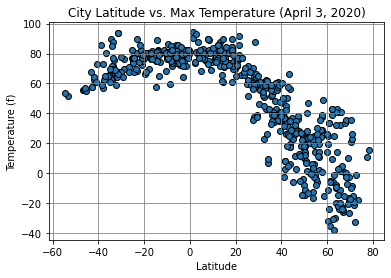

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp(f)"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Max Temperature (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

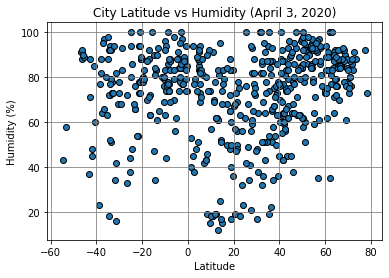

In [12]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs Humidity (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness')

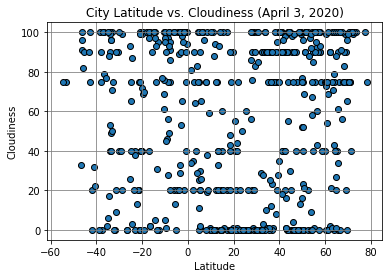

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Cloudiness (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

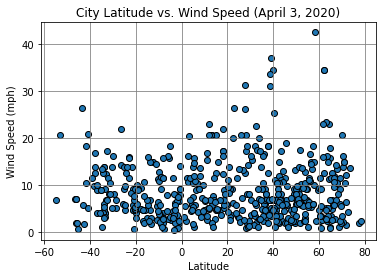

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Wind Speed (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [15]:
def linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
    line = slope*x+intercept
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x,line,"-", color='r',linewidth=3)
    #plt.annotate(line,(x,y),fontsize=15,color="red")
    
    if slope < 0:
        print(f"R-Squared Value: -{r_value**2}")
    else:
        print(f"R-Squared Value: {r_value**2}")


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
northern = weather_df[weather_df['Latitude']>0]
southern = weather_df[weather_df['Latitude']<0]


The r-squared is: -0.8713976706860305


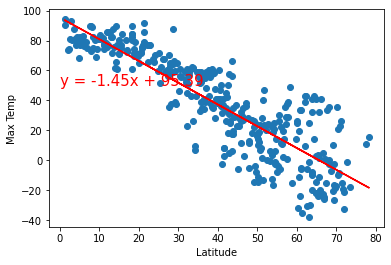

<Figure size 432x288 with 0 Axes>

In [27]:



x_values=northern['Latitude']

y_values = northern['Max Temp(f)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/N_linear_Lat_MT.png')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.40014568639991943


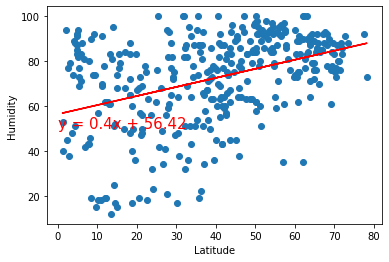

FileNotFoundError: [Errno 2] No such file or directory: '../output_data/N_linear_Lat_Hum.png'

<Figure size 432x288 with 0 Axes>

In [28]:
x_values =northern['Latitude']

y_values = northern['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('../output_data/N_linear_Lat_Hum.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression